In [1]:
import numpy as np 
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_price), (test_data, test_price) = boston_housing.load_data()

# Preprocessing data by standardisation/normalisation to scale data to same range

In [5]:
mean = np.mean(train_data, axis = 0)

In [6]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [7]:
train_data -= mean

In [9]:
std_var = np.std(train_data, axis = 0)
train_data /= std_var

In [10]:
test_data -= mean
test_data /= std_var

# Building the neural network model

In [15]:
def build_model(lr = 1e-3): 
    '''
    : this function creates a neural network model
    : output -> returns the compiled model
    '''
    assert isinstance(lr, float)
    model = models.Sequential()
    model.add(layers.Dense(128, activation = 'relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation= 'relu'))
    model.add(layers.Dense(1))
    loss = mean_squared_error
    optimizer = Adam(learning_rate=lr)
    model.compile(loss= loss, optimizer = optimizer, metrics=['mae'])
    return model
    

# K-Fold cross validation for best hyperparameters

In [19]:
K = 5
split_size = len(train_data) // K
learning_rate = [1e-5,1e-4,1e-3,1e-2,1e-1]
learning_rate_loss = {} 
for lr in learning_rate:
    val_accuracy = []
    for k in range(K):
        x_val = train_data[k*split_size: (k+1)*split_size]
        y_val = train_price[k*split_size: (k+1)*split_size]
        x_partial_train = np.concatenate([train_data[:k*split_size], train_data[(k+1)*split_size:]], axis = 0)
        y_partial_train = np.concatenate([train_price[:k*split_size], train_price[(k+1)*split_size:]], axis = 0)
        model = build_model(lr= lr)
        history = model.fit(x_partial_train, y_partial_train, epochs = 100, batch_size = 32, validation_data = (x_val, y_val))
        history = history.history
        val_accuracy.append(history['val_mae'])
    avg_val_accuracy = np.mean(val_accuracy)
    learning_rate_loss.update({lr:avg_val_accuracy})
        


Epoch 1/100
11/11 [==============================] - 1s 40ms/step - loss: 634.1666 - mae: 23.2309 - val_loss: 487.3581 - val_mae: 20.3644
Epoch 2/100
11/11 [==============================] - 0s 26ms/step - loss: 651.7462 - mae: 23.7105 - val_loss: 486.8640 - val_mae: 20.3525
Epoch 3/100
11/11 [==============================] - 0s 27ms/step - loss: 610.3902 - mae: 23.1266 - val_loss: 486.3725 - val_mae: 20.3407
Epoch 4/100
11/11 [==============================] - 0s 26ms/step - loss: 644.8482 - mae: 23.6556 - val_loss: 485.8762 - val_mae: 20.3287
Epoch 5/100
11/11 [==============================] - 0s 23ms/step - loss: 654.3765 - mae: 23.6370 - val_loss: 485.3727 - val_mae: 20.3166
Epoch 6/100
11/11 [==============================] - 0s 26ms/step - loss: 645.1707 - mae: 23.7253 - val_loss: 484.8691 - val_mae: 20.3046
Epoch 7/100
11/11 [==============================] - 0s 16ms/step - loss: 599.6044 - mae: 22.7380 - val_loss: 484.3748 - val_mae: 20.2926
Epoch 8/100
11/11 [===============

11/11 [==============================] - 0s 16ms/step - loss: 611.1294 - mae: 22.8987 - val_loss: 457.6292 - val_mae: 19.6308
Epoch 61/100
11/11 [==============================] - 0s 48ms/step - loss: 608.4666 - mae: 22.7763 - val_loss: 457.1008 - val_mae: 19.6176
Epoch 62/100
11/11 [==============================] - 0s 19ms/step - loss: 578.6628 - mae: 22.4166 - val_loss: 456.5727 - val_mae: 19.6041
Epoch 63/100
11/11 [==============================] - 0s 30ms/step - loss: 568.8802 - mae: 22.0495 - val_loss: 456.0301 - val_mae: 19.5905
Epoch 64/100
11/11 [==============================] - 0s 22ms/step - loss: 623.7562 - mae: 23.0975 - val_loss: 455.4876 - val_mae: 19.5771
Epoch 65/100
11/11 [==============================] - 0s 22ms/step - loss: 605.4549 - mae: 22.8078 - val_loss: 454.9484 - val_mae: 19.5637
Epoch 66/100
11/11 [==============================] - 0s 22ms/step - loss: 588.8178 - mae: 22.4870 - val_loss: 454.4050 - val_mae: 19.5498
Epoch 67/100
11/11 [====================

11/11 [==============================] - 0s 19ms/step - loss: 536.2509 - mae: 21.5904 - val_loss: 651.0939 - val_mae: 23.4113
Epoch 20/100
11/11 [==============================] - 0s 28ms/step - loss: 553.2894 - mae: 21.9285 - val_loss: 650.3676 - val_mae: 23.3962
Epoch 21/100
11/11 [==============================] - 0s 20ms/step - loss: 577.9208 - mae: 22.0998 - val_loss: 649.6505 - val_mae: 23.3811
Epoch 22/100
11/11 [==============================] - 0s 21ms/step - loss: 578.9220 - mae: 22.1922 - val_loss: 648.9080 - val_mae: 23.3657
Epoch 23/100
11/11 [==============================] - 0s 18ms/step - loss: 563.9122 - mae: 22.0744 - val_loss: 648.1807 - val_mae: 23.3506
Epoch 24/100
11/11 [==============================] - 0s 21ms/step - loss: 566.1679 - mae: 21.8897 - val_loss: 647.4519 - val_mae: 23.3354
Epoch 25/100
11/11 [==============================] - 0s 24ms/step - loss: 509.6835 - mae: 20.9447 - val_loss: 646.6887 - val_mae: 23.3197
Epoch 26/100
11/11 [====================

11/11 [==============================] - 0s 15ms/step - loss: 520.5568 - mae: 20.8999 - val_loss: 603.5179 - val_mae: 22.4048
Epoch 79/100
11/11 [==============================] - 0s 20ms/step - loss: 519.7041 - mae: 20.9892 - val_loss: 602.6510 - val_mae: 22.3862
Epoch 80/100
11/11 [==============================] - 0s 19ms/step - loss: 460.2640 - mae: 19.7789 - val_loss: 601.7871 - val_mae: 22.3674
Epoch 81/100
11/11 [==============================] - 0s 29ms/step - loss: 518.5819 - mae: 20.9584 - val_loss: 600.9188 - val_mae: 22.3486
Epoch 82/100
11/11 [==============================] - 0s 16ms/step - loss: 502.2437 - mae: 20.7579 - val_loss: 600.0242 - val_mae: 22.3295
Epoch 83/100
11/11 [==============================] - 0s 12ms/step - loss: 513.9578 - mae: 20.7587 - val_loss: 599.1188 - val_mae: 22.3101
Epoch 84/100
11/11 [==============================] - 0s 20ms/step - loss: 517.5314 - mae: 20.7567 - val_loss: 598.2335 - val_mae: 22.2908
Epoch 85/100
11/11 [====================

Epoch 37/100
11/11 [==============================] - 0s 21ms/step - loss: 565.7668 - mae: 21.8798 - val_loss: 517.3600 - val_mae: 21.6432
Epoch 38/100
11/11 [==============================] - 0s 13ms/step - loss: 563.8976 - mae: 22.0550 - val_loss: 516.7975 - val_mae: 21.6307
Epoch 39/100
11/11 [==============================] - 0s 20ms/step - loss: 578.6199 - mae: 22.0352 - val_loss: 516.2203 - val_mae: 21.6180
Epoch 40/100
11/11 [==============================] - 0s 24ms/step - loss: 608.8306 - mae: 22.5754 - val_loss: 515.6389 - val_mae: 21.6053
Epoch 41/100
11/11 [==============================] - 0s 23ms/step - loss: 577.2961 - mae: 21.9480 - val_loss: 515.0663 - val_mae: 21.5927
Epoch 42/100
11/11 [==============================] - 0s 12ms/step - loss: 598.6480 - mae: 22.4261 - val_loss: 514.5132 - val_mae: 21.5803
Epoch 43/100
11/11 [==============================] - 0s 13ms/step - loss: 558.9873 - mae: 21.5984 - val_loss: 513.9598 - val_mae: 21.5681
Epoch 44/100
11/11 [=======

Epoch 96/100
11/11 [==============================] - 0s 16ms/step - loss: 533.9913 - mae: 21.1848 - val_loss: 481.0464 - val_mae: 20.8262
Epoch 97/100
11/11 [==============================] - 0s 17ms/step - loss: 530.9782 - mae: 21.2610 - val_loss: 480.3477 - val_mae: 20.8102
Epoch 98/100
11/11 [==============================] - 0s 25ms/step - loss: 499.3012 - mae: 20.6917 - val_loss: 479.6635 - val_mae: 20.7945
Epoch 99/100
11/11 [==============================] - 0s 21ms/step - loss: 533.8993 - mae: 21.2340 - val_loss: 478.9452 - val_mae: 20.7782
Epoch 100/100
11/11 [==============================] - 0s 15ms/step - loss: 540.0997 - mae: 21.1899 - val_loss: 478.2503 - val_mae: 20.7623
Epoch 1/100
11/11 [==============================] - 1s 37ms/step - loss: 587.1293 - mae: 22.3900 - val_loss: 582.1517 - val_mae: 21.9689
Epoch 2/100
11/11 [==============================] - 0s 24ms/step - loss: 592.4988 - mae: 22.3776 - val_loss: 581.5583 - val_mae: 21.9549
Epoch 3/100
11/11 [=========

Epoch 55/100
11/11 [==============================] - 0s 24ms/step - loss: 526.2262 - mae: 21.0157 - val_loss: 549.8778 - val_mae: 21.1998
Epoch 56/100
11/11 [==============================] - 0s 30ms/step - loss: 589.8425 - mae: 22.4292 - val_loss: 549.2390 - val_mae: 21.1846
Epoch 57/100
11/11 [==============================] - 0s 12ms/step - loss: 523.0318 - mae: 20.9962 - val_loss: 548.6155 - val_mae: 21.1693
Epoch 58/100
11/11 [==============================] - 0s 30ms/step - loss: 549.0029 - mae: 21.5152 - val_loss: 547.9754 - val_mae: 21.1540
Epoch 59/100
11/11 [==============================] - 0s 14ms/step - loss: 558.4454 - mae: 21.8757 - val_loss: 547.3287 - val_mae: 21.1384
Epoch 60/100
11/11 [==============================] - 0s 17ms/step - loss: 541.1389 - mae: 21.2907 - val_loss: 546.6818 - val_mae: 21.1229
Epoch 61/100
11/11 [==============================] - 0s 25ms/step - loss: 578.3585 - mae: 22.0810 - val_loss: 546.0222 - val_mae: 21.1071
Epoch 62/100
11/11 [=======

Epoch 14/100
11/11 [==============================] - 0s 23ms/step - loss: 596.8959 - mae: 22.5162 - val_loss: 679.3079 - val_mae: 24.1167
Epoch 15/100
11/11 [==============================] - 0s 15ms/step - loss: 600.9303 - mae: 22.6746 - val_loss: 678.5800 - val_mae: 24.1021
Epoch 16/100
11/11 [==============================] - 0s 17ms/step - loss: 575.3895 - mae: 22.1285 - val_loss: 677.8594 - val_mae: 24.0875
Epoch 17/100
11/11 [==============================] - 0s 18ms/step - loss: 580.7966 - mae: 22.4249 - val_loss: 677.1223 - val_mae: 24.0727
Epoch 18/100
11/11 [==============================] - 0s 18ms/step - loss: 565.7614 - mae: 22.1057 - val_loss: 676.3752 - val_mae: 24.0576
Epoch 19/100
11/11 [==============================] - 0s 17ms/step - loss: 549.7748 - mae: 21.5735 - val_loss: 675.6216 - val_mae: 24.0424
Epoch 20/100
11/11 [==============================] - 0s 16ms/step - loss: 567.4082 - mae: 21.9561 - val_loss: 674.8829 - val_mae: 24.0276
Epoch 21/100
11/11 [=======

Epoch 73/100
11/11 [==============================] - 0s 16ms/step - loss: 537.6221 - mae: 21.3421 - val_loss: 636.1182 - val_mae: 23.2351
Epoch 74/100
11/11 [==============================] - 0s 17ms/step - loss: 531.4039 - mae: 21.3089 - val_loss: 635.3981 - val_mae: 23.2200
Epoch 75/100
11/11 [==============================] - 0s 14ms/step - loss: 552.3519 - mae: 21.5254 - val_loss: 634.6433 - val_mae: 23.2043
Epoch 76/100
11/11 [==============================] - 0s 12ms/step - loss: 513.6127 - mae: 20.7495 - val_loss: 633.9108 - val_mae: 23.1888
Epoch 77/100
11/11 [==============================] - 0s 11ms/step - loss: 553.9714 - mae: 21.7657 - val_loss: 633.1681 - val_mae: 23.1734
Epoch 78/100
11/11 [==============================] - 0s 12ms/step - loss: 544.2756 - mae: 21.4401 - val_loss: 632.4067 - val_mae: 23.1576
Epoch 79/100
11/11 [==============================] - 0s 11ms/step - loss: 544.8336 - mae: 21.3479 - val_loss: 631.6393 - val_mae: 23.1417
Epoch 80/100
11/11 [=======

Epoch 32/100
11/11 [==============================] - 0s 15ms/step - loss: 308.3285 - mae: 15.5138 - val_loss: 234.5784 - val_mae: 13.0094
Epoch 33/100
11/11 [==============================] - 0s 16ms/step - loss: 326.3043 - mae: 15.7964 - val_loss: 223.9310 - val_mae: 12.6605
Epoch 34/100
11/11 [==============================] - 0s 19ms/step - loss: 287.3950 - mae: 14.7845 - val_loss: 213.4421 - val_mae: 12.3059
Epoch 35/100
11/11 [==============================] - 0s 19ms/step - loss: 293.1562 - mae: 15.0108 - val_loss: 202.4366 - val_mae: 11.9388
Epoch 36/100
11/11 [==============================] - 0s 21ms/step - loss: 274.1443 - mae: 14.5395 - val_loss: 191.7977 - val_mae: 11.5786
Epoch 37/100
11/11 [==============================] - 0s 26ms/step - loss: 271.7503 - mae: 14.2159 - val_loss: 181.5586 - val_mae: 11.2217
Epoch 38/100
11/11 [==============================] - 0s 28ms/step - loss: 266.0167 - mae: 14.0572 - val_loss: 171.6960 - val_mae: 10.8706
Epoch 39/100
11/11 [=======

11/11 [==============================] - 0s 12ms/step - loss: 31.2956 - mae: 4.0036 - val_loss: 25.2040 - val_mae: 3.2926
Epoch 93/100
11/11 [==============================] - 0s 12ms/step - loss: 25.4008 - mae: 3.7794 - val_loss: 24.9285 - val_mae: 3.2728
Epoch 94/100
11/11 [==============================] - 0s 16ms/step - loss: 22.7030 - mae: 3.6834 - val_loss: 24.6742 - val_mae: 3.2508
Epoch 95/100
11/11 [==============================] - 0s 21ms/step - loss: 29.6657 - mae: 3.9411 - val_loss: 24.3806 - val_mae: 3.2270
Epoch 96/100
11/11 [==============================] - 0s 17ms/step - loss: 23.8100 - mae: 3.7438 - val_loss: 24.1063 - val_mae: 3.2057
Epoch 97/100
11/11 [==============================] - 0s 15ms/step - loss: 20.6991 - mae: 3.3829 - val_loss: 23.7827 - val_mae: 3.1967
Epoch 98/100
11/11 [==============================] - 0s 12ms/step - loss: 25.4411 - mae: 3.6928 - val_loss: 23.5265 - val_mae: 3.1884
Epoch 99/100
11/11 [==============================] - 0s 15ms/step -

11/11 [==============================] - 0s 21ms/step - loss: 78.2131 - mae: 6.6523 - val_loss: 80.9291 - val_mae: 7.1215
Epoch 52/100
11/11 [==============================] - 0s 27ms/step - loss: 60.3406 - mae: 6.1353 - val_loss: 76.3972 - val_mae: 6.9001
Epoch 53/100
11/11 [==============================] - 0s 15ms/step - loss: 67.8247 - mae: 6.2045 - val_loss: 72.3347 - val_mae: 6.7110
Epoch 54/100
11/11 [==============================] - 0s 19ms/step - loss: 60.5584 - mae: 5.8755 - val_loss: 68.7307 - val_mae: 6.5444
Epoch 55/100
11/11 [==============================] - 0s 21ms/step - loss: 55.2298 - mae: 5.7334 - val_loss: 65.6518 - val_mae: 6.3989
Epoch 56/100
11/11 [==============================] - 0s 23ms/step - loss: 61.7253 - mae: 5.8048 - val_loss: 62.7899 - val_mae: 6.2578
Epoch 57/100
11/11 [==============================] - 0s 23ms/step - loss: 50.7424 - mae: 5.5455 - val_loss: 60.0953 - val_mae: 6.1212
Epoch 58/100
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 16ms/step - loss: 527.1028 - mae: 20.7560 - val_loss: 448.0020 - val_mae: 19.8737
Epoch 12/100
11/11 [==============================] - 0s 14ms/step - loss: 531.8710 - mae: 20.9082 - val_loss: 439.3954 - val_mae: 19.6523
Epoch 13/100
11/11 [==============================] - 0s 15ms/step - loss: 486.4445 - mae: 19.7813 - val_loss: 430.4377 - val_mae: 19.4185
Epoch 14/100
11/11 [==============================] - 0s 18ms/step - loss: 464.7729 - mae: 19.5687 - val_loss: 420.8884 - val_mae: 19.1653
Epoch 15/100
11/11 [==============================] - 0s 11ms/step - loss: 456.3387 - mae: 19.1587 - val_loss: 411.2058 - val_mae: 18.9063
Epoch 16/100
11/11 [==============================] - 0s 20ms/step - loss: 494.4272 - mae: 19.9445 - val_loss: 401.1152 - val_mae: 18.6340
Epoch 17/100
11/11 [==============================] - 0s 16ms/step - loss: 439.9335 - mae: 18.6059 - val_loss: 390.6920 - val_mae: 18.3506
Epoch 18/100
11/11 [====================

Epoch 71/100
11/11 [==============================] - 0s 13ms/step - loss: 43.3198 - mae: 4.8453 - val_loss: 31.4384 - val_mae: 4.4612
Epoch 72/100
11/11 [==============================] - 0s 9ms/step - loss: 42.6762 - mae: 4.7863 - val_loss: 30.4635 - val_mae: 4.3921
Epoch 73/100
11/11 [==============================] - 0s 16ms/step - loss: 42.1999 - mae: 4.8782 - val_loss: 29.5861 - val_mae: 4.3241
Epoch 74/100
11/11 [==============================] - 0s 21ms/step - loss: 46.3744 - mae: 4.9019 - val_loss: 28.7858 - val_mae: 4.2686
Epoch 75/100
11/11 [==============================] - 0s 19ms/step - loss: 45.6385 - mae: 4.7035 - val_loss: 28.0487 - val_mae: 4.2131
Epoch 76/100
11/11 [==============================] - 0s 14ms/step - loss: 37.6317 - mae: 4.4279 - val_loss: 27.3495 - val_mae: 4.1641
Epoch 77/100
11/11 [==============================] - 0s 17ms/step - loss: 37.6424 - mae: 4.4729 - val_loss: 26.6106 - val_mae: 4.1103
Epoch 78/100
11/11 [==============================] - 0s

Epoch 31/100
11/11 [==============================] - 0s 21ms/step - loss: 321.7242 - mae: 15.7820 - val_loss: 298.0244 - val_mae: 14.7322
Epoch 32/100
11/11 [==============================] - 0s 21ms/step - loss: 314.5302 - mae: 15.6314 - val_loss: 285.0738 - val_mae: 14.3525
Epoch 33/100
11/11 [==============================] - 0s 18ms/step - loss: 274.9018 - mae: 14.5687 - val_loss: 272.1633 - val_mae: 13.9674
Epoch 34/100
11/11 [==============================] - 0s 21ms/step - loss: 246.9694 - mae: 13.8048 - val_loss: 259.6801 - val_mae: 13.5885
Epoch 35/100
11/11 [==============================] - 0s 18ms/step - loss: 256.4848 - mae: 14.0711 - val_loss: 247.2916 - val_mae: 13.2028
Epoch 36/100
11/11 [==============================] - 0s 21ms/step - loss: 230.8056 - mae: 13.2196 - val_loss: 235.3601 - val_mae: 12.8249
Epoch 37/100
11/11 [==============================] - 0s 20ms/step - loss: 230.1864 - mae: 13.2052 - val_loss: 223.6813 - val_mae: 12.4418
Epoch 38/100
11/11 [=======

Epoch 91/100
11/11 [==============================] - 0s 15ms/step - loss: 27.3795 - mae: 4.0757 - val_loss: 41.0261 - val_mae: 4.7229
Epoch 92/100
11/11 [==============================] - 0s 15ms/step - loss: 28.8556 - mae: 4.0507 - val_loss: 40.5306 - val_mae: 4.6838
Epoch 93/100
11/11 [==============================] - 0s 21ms/step - loss: 26.4646 - mae: 3.9682 - val_loss: 40.0099 - val_mae: 4.6401
Epoch 94/100
11/11 [==============================] - 0s 19ms/step - loss: 25.2075 - mae: 3.7673 - val_loss: 39.5777 - val_mae: 4.6033
Epoch 95/100
11/11 [==============================] - 0s 25ms/step - loss: 28.0293 - mae: 4.0578 - val_loss: 39.0955 - val_mae: 4.5629
Epoch 96/100
11/11 [==============================] - 0s 28ms/step - loss: 28.9349 - mae: 4.1941 - val_loss: 38.5867 - val_mae: 4.5156
Epoch 97/100
11/11 [==============================] - 0s 23ms/step - loss: 24.6175 - mae: 3.8104 - val_loss: 38.1425 - val_mae: 4.4763
Epoch 98/100
11/11 [==============================] - 0

11/11 [==============================] - 0s 23ms/step - loss: 82.5881 - mae: 7.0368 - val_loss: 126.2056 - val_mae: 8.3016
Epoch 51/100
11/11 [==============================] - 0s 25ms/step - loss: 80.7657 - mae: 6.8843 - val_loss: 121.2739 - val_mae: 8.0936
Epoch 52/100
11/11 [==============================] - 0s 22ms/step - loss: 70.9887 - mae: 6.4628 - val_loss: 116.8114 - val_mae: 7.9019
Epoch 53/100
11/11 [==============================] - 0s 15ms/step - loss: 76.4587 - mae: 6.5151 - val_loss: 112.5410 - val_mae: 7.7197
Epoch 54/100
11/11 [==============================] - 0s 12ms/step - loss: 58.5165 - mae: 5.9034 - val_loss: 108.5846 - val_mae: 7.5463
Epoch 55/100
11/11 [==============================] - 0s 16ms/step - loss: 62.8344 - mae: 5.9812 - val_loss: 104.8767 - val_mae: 7.3876
Epoch 56/100
11/11 [==============================] - 0s 14ms/step - loss: 61.4527 - mae: 6.0315 - val_loss: 101.5334 - val_mae: 7.2437
Epoch 57/100
11/11 [==============================] - 0s 20ms

11/11 [==============================] - 0s 27ms/step - loss: 36.4883 - mae: 4.5283 - val_loss: 26.3366 - val_mae: 3.5027
Epoch 11/100
11/11 [==============================] - 0s 27ms/step - loss: 25.5960 - mae: 3.8332 - val_loss: 24.1148 - val_mae: 3.3544
Epoch 12/100
11/11 [==============================] - 0s 28ms/step - loss: 24.6575 - mae: 3.6006 - val_loss: 22.4384 - val_mae: 3.2991
Epoch 13/100
11/11 [==============================] - 0s 16ms/step - loss: 18.2639 - mae: 3.2867 - val_loss: 21.2582 - val_mae: 3.1759
Epoch 14/100
11/11 [==============================] - 0s 11ms/step - loss: 19.0477 - mae: 3.3271 - val_loss: 19.8898 - val_mae: 3.0958
Epoch 15/100
11/11 [==============================] - 0s 12ms/step - loss: 22.4852 - mae: 3.4651 - val_loss: 19.3677 - val_mae: 3.2370
Epoch 16/100
11/11 [==============================] - 0s 13ms/step - loss: 16.8590 - mae: 3.1495 - val_loss: 17.7290 - val_mae: 2.9849
Epoch 17/100
11/11 [==============================] - 0s 18ms/step -

11/11 [==============================] - 0s 17ms/step - loss: 8.6399 - mae: 2.1662 - val_loss: 6.9720 - val_mae: 1.8505
Epoch 72/100
11/11 [==============================] - 0s 13ms/step - loss: 8.1508 - mae: 2.0534 - val_loss: 6.9549 - val_mae: 1.9295
Epoch 73/100
11/11 [==============================] - 0s 12ms/step - loss: 9.3062 - mae: 2.2113 - val_loss: 7.2364 - val_mae: 2.0517
Epoch 74/100
11/11 [==============================] - 0s 20ms/step - loss: 9.6293 - mae: 2.1815 - val_loss: 6.7071 - val_mae: 1.8556
Epoch 75/100
11/11 [==============================] - 0s 16ms/step - loss: 8.8865 - mae: 2.1914 - val_loss: 6.7653 - val_mae: 1.7955
Epoch 76/100
11/11 [==============================] - 0s 22ms/step - loss: 9.0898 - mae: 2.0563 - val_loss: 6.6010 - val_mae: 1.8363
Epoch 77/100
11/11 [==============================] - 0s 23ms/step - loss: 8.2400 - mae: 2.1614 - val_loss: 6.7112 - val_mae: 1.8488
Epoch 78/100
11/11 [==============================] - 0s 12ms/step - loss: 8.4955 

Epoch 32/100
11/11 [==============================] - 0s 11ms/step - loss: 8.8483 - mae: 2.1746 - val_loss: 13.8771 - val_mae: 2.9044
Epoch 33/100
11/11 [==============================] - 0s 13ms/step - loss: 11.4808 - mae: 2.3689 - val_loss: 14.0580 - val_mae: 2.8892
Epoch 34/100
11/11 [==============================] - 0s 18ms/step - loss: 10.6134 - mae: 2.2716 - val_loss: 14.2067 - val_mae: 2.9346
Epoch 35/100
11/11 [==============================] - 0s 14ms/step - loss: 8.8733 - mae: 2.1610 - val_loss: 13.4055 - val_mae: 2.8639
Epoch 36/100
11/11 [==============================] - 0s 16ms/step - loss: 9.9856 - mae: 2.2752 - val_loss: 13.9086 - val_mae: 2.8859
Epoch 37/100
11/11 [==============================] - 0s 19ms/step - loss: 9.9700 - mae: 2.2569 - val_loss: 14.1837 - val_mae: 2.9479
Epoch 38/100
11/11 [==============================] - 0s 17ms/step - loss: 8.3385 - mae: 2.1579 - val_loss: 13.0742 - val_mae: 2.8386
Epoch 39/100
11/11 [==============================] - 0s 15m

11/11 [==============================] - 0s 29ms/step - loss: 5.7391 - mae: 1.8123 - val_loss: 12.2559 - val_mae: 2.7515
Epoch 94/100
11/11 [==============================] - 0s 20ms/step - loss: 6.6579 - mae: 1.8898 - val_loss: 12.7506 - val_mae: 2.8150
Epoch 95/100
11/11 [==============================] - 0s 15ms/step - loss: 5.9839 - mae: 1.8329 - val_loss: 11.7969 - val_mae: 2.6549
Epoch 96/100
11/11 [==============================] - 0s 19ms/step - loss: 5.4567 - mae: 1.6970 - val_loss: 12.3487 - val_mae: 2.7084
Epoch 97/100
11/11 [==============================] - 0s 23ms/step - loss: 6.2367 - mae: 1.8297 - val_loss: 12.2270 - val_mae: 2.6949
Epoch 98/100
11/11 [==============================] - 0s 18ms/step - loss: 6.5050 - mae: 1.7764 - val_loss: 12.4853 - val_mae: 2.7070
Epoch 99/100
11/11 [==============================] - 0s 20ms/step - loss: 6.6423 - mae: 1.9209 - val_loss: 11.9223 - val_mae: 2.6637
Epoch 100/100
11/11 [==============================] - 0s 20ms/step - loss:

Epoch 54/100
11/11 [==============================] - 0s 16ms/step - loss: 9.2146 - mae: 2.1449 - val_loss: 9.8878 - val_mae: 2.4690
Epoch 55/100
11/11 [==============================] - 0s 18ms/step - loss: 7.9006 - mae: 2.0546 - val_loss: 9.5925 - val_mae: 2.4267
Epoch 56/100
11/11 [==============================] - 0s 17ms/step - loss: 9.2346 - mae: 2.1269 - val_loss: 9.9263 - val_mae: 2.4906
Epoch 57/100
11/11 [==============================] - 0s 19ms/step - loss: 10.3676 - mae: 2.2944 - val_loss: 10.2141 - val_mae: 2.5248
Epoch 58/100
11/11 [==============================] - 0s 15ms/step - loss: 8.7115 - mae: 2.1767 - val_loss: 9.6575 - val_mae: 2.4278
Epoch 59/100
11/11 [==============================] - 0s 14ms/step - loss: 8.7836 - mae: 2.1447 - val_loss: 10.0793 - val_mae: 2.5031
Epoch 60/100
11/11 [==============================] - 0s 18ms/step - loss: 8.8196 - mae: 2.2096 - val_loss: 10.4098 - val_mae: 2.5730
Epoch 61/100
11/11 [==============================] - 0s 22ms/ste

11/11 [==============================] - 0s 18ms/step - loss: 14.9385 - mae: 2.8476 - val_loss: 23.4318 - val_mae: 3.1660
Epoch 16/100
11/11 [==============================] - 0s 14ms/step - loss: 15.2797 - mae: 2.9247 - val_loss: 22.6811 - val_mae: 3.1126
Epoch 17/100
11/11 [==============================] - 0s 13ms/step - loss: 13.0289 - mae: 2.7125 - val_loss: 22.0729 - val_mae: 3.0719
Epoch 18/100
11/11 [==============================] - 0s 15ms/step - loss: 12.5737 - mae: 2.7442 - val_loss: 21.9780 - val_mae: 3.1054
Epoch 19/100
11/11 [==============================] - 0s 16ms/step - loss: 12.8350 - mae: 2.6652 - val_loss: 21.4965 - val_mae: 3.0283
Epoch 20/100
11/11 [==============================] - 0s 20ms/step - loss: 10.8773 - mae: 2.5159 - val_loss: 20.8926 - val_mae: 2.9465
Epoch 21/100
11/11 [==============================] - 0s 16ms/step - loss: 14.6085 - mae: 2.7395 - val_loss: 20.5128 - val_mae: 2.9356
Epoch 22/100
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 33ms/step - loss: 6.8348 - mae: 1.9140 - val_loss: 15.6868 - val_mae: 2.5281
Epoch 77/100
11/11 [==============================] - 0s 30ms/step - loss: 5.7202 - mae: 1.8153 - val_loss: 16.2697 - val_mae: 2.5841
Epoch 78/100
11/11 [==============================] - 0s 12ms/step - loss: 6.1580 - mae: 1.8606 - val_loss: 15.9474 - val_mae: 2.6532
Epoch 79/100
11/11 [==============================] - 0s 24ms/step - loss: 6.9581 - mae: 2.0355 - val_loss: 17.0253 - val_mae: 2.6646
Epoch 80/100
11/11 [==============================] - 0s 25ms/step - loss: 6.6295 - mae: 1.9341 - val_loss: 16.5733 - val_mae: 2.6458
Epoch 81/100
11/11 [==============================] - 0s 30ms/step - loss: 6.9252 - mae: 1.9279 - val_loss: 16.0864 - val_mae: 2.5508
Epoch 82/100
11/11 [==============================] - 0s 27ms/step - loss: 5.9071 - mae: 1.8453 - val_loss: 15.7778 - val_mae: 2.5612
Epoch 83/100
11/11 [==============================] - 0s 22ms/step - loss: 

Epoch 37/100
11/11 [==============================] - 0s 14ms/step - loss: 11.0918 - mae: 2.2781 - val_loss: 13.5958 - val_mae: 2.6629
Epoch 38/100
11/11 [==============================] - 0s 15ms/step - loss: 11.2661 - mae: 2.3799 - val_loss: 13.5659 - val_mae: 2.6871
Epoch 39/100
11/11 [==============================] - 0s 12ms/step - loss: 10.7462 - mae: 2.2007 - val_loss: 13.4529 - val_mae: 2.6726
Epoch 40/100
11/11 [==============================] - 0s 15ms/step - loss: 9.7708 - mae: 2.2280 - val_loss: 13.3788 - val_mae: 2.6778
Epoch 41/100
11/11 [==============================] - 0s 12ms/step - loss: 9.2165 - mae: 2.1939 - val_loss: 13.1791 - val_mae: 2.6405
Epoch 42/100
11/11 [==============================] - 0s 16ms/step - loss: 10.7811 - mae: 2.2594 - val_loss: 13.3789 - val_mae: 2.6736
Epoch 43/100
11/11 [==============================] - 0s 23ms/step - loss: 9.0956 - mae: 2.1994 - val_loss: 13.2004 - val_mae: 2.6637
Epoch 44/100
11/11 [==============================] - 0s 1

11/11 [==============================] - 0s 21ms/step - loss: 6.1435 - mae: 1.7176 - val_loss: 10.5714 - val_mae: 2.4318
Epoch 99/100
11/11 [==============================] - 0s 26ms/step - loss: 5.5379 - mae: 1.6094 - val_loss: 10.8543 - val_mae: 2.5176
Epoch 100/100
11/11 [==============================] - 0s 25ms/step - loss: 6.5185 - mae: 1.7637 - val_loss: 10.5830 - val_mae: 2.4473
Epoch 1/100
11/11 [==============================] - 1s 36ms/step - loss: 425.1009 - mae: 18.1752 - val_loss: 144.3512 - val_mae: 9.0640
Epoch 2/100
11/11 [==============================] - 0s 23ms/step - loss: 120.5629 - mae: 8.0273 - val_loss: 50.1847 - val_mae: 5.0923
Epoch 3/100
11/11 [==============================] - 0s 18ms/step - loss: 54.0837 - mae: 5.6022 - val_loss: 19.8423 - val_mae: 3.0834
Epoch 4/100
11/11 [==============================] - 0s 19ms/step - loss: 22.9586 - mae: 3.6735 - val_loss: 20.3768 - val_mae: 3.4329
Epoch 5/100
11/11 [==============================] - 0s 15ms/step - lo

11/11 [==============================] - 0s 10ms/step - loss: 5.8117 - mae: 1.7530 - val_loss: 7.3549 - val_mae: 1.9537
Epoch 60/100
11/11 [==============================] - 0s 10ms/step - loss: 9.2572 - mae: 2.1106 - val_loss: 5.9687 - val_mae: 1.8272
Epoch 61/100
11/11 [==============================] - 0s 9ms/step - loss: 4.7887 - mae: 1.6558 - val_loss: 7.6444 - val_mae: 2.1674
Epoch 62/100
11/11 [==============================] - 0s 9ms/step - loss: 6.4517 - mae: 1.9482 - val_loss: 6.2093 - val_mae: 1.7567
Epoch 63/100
11/11 [==============================] - 0s 11ms/step - loss: 5.9581 - mae: 1.8245 - val_loss: 6.5919 - val_mae: 1.8478
Epoch 64/100
11/11 [==============================] - 0s 11ms/step - loss: 4.3611 - mae: 1.5562 - val_loss: 6.0954 - val_mae: 1.8543
Epoch 65/100
11/11 [==============================] - 0s 16ms/step - loss: 5.2774 - mae: 1.6976 - val_loss: 5.8795 - val_mae: 1.9378
Epoch 66/100
11/11 [==============================] - 0s 14ms/step - loss: 4.9043 - 

11/11 [==============================] - 0s 15ms/step - loss: 8.3196 - mae: 1.9907 - val_loss: 11.4288 - val_mae: 2.6569
Epoch 21/100
11/11 [==============================] - 0s 14ms/step - loss: 7.5211 - mae: 2.0614 - val_loss: 12.7322 - val_mae: 2.7711
Epoch 22/100
11/11 [==============================] - 0s 13ms/step - loss: 8.1535 - mae: 2.0291 - val_loss: 13.1625 - val_mae: 2.8305
Epoch 23/100
11/11 [==============================] - 0s 13ms/step - loss: 9.5217 - mae: 2.3491 - val_loss: 11.7186 - val_mae: 2.6796
Epoch 24/100
11/11 [==============================] - 0s 12ms/step - loss: 6.9537 - mae: 2.0280 - val_loss: 13.6872 - val_mae: 2.8252
Epoch 25/100
11/11 [==============================] - 0s 12ms/step - loss: 7.7433 - mae: 2.0561 - val_loss: 15.8056 - val_mae: 3.0679
Epoch 26/100
11/11 [==============================] - 0s 10ms/step - loss: 7.4739 - mae: 2.0944 - val_loss: 15.0307 - val_mae: 2.9240
Epoch 27/100
11/11 [==============================] - 0s 10ms/step - loss: 

11/11 [==============================] - 0s 10ms/step - loss: 4.9968 - mae: 1.5897 - val_loss: 15.2797 - val_mae: 3.0004
Epoch 82/100
11/11 [==============================] - 0s 12ms/step - loss: 5.7557 - mae: 1.8019 - val_loss: 12.0266 - val_mae: 2.6437
Epoch 83/100
11/11 [==============================] - 0s 12ms/step - loss: 6.0765 - mae: 1.8157 - val_loss: 10.9617 - val_mae: 2.4407
Epoch 84/100
11/11 [==============================] - 0s 14ms/step - loss: 5.4371 - mae: 1.7182 - val_loss: 15.8814 - val_mae: 3.0337
Epoch 85/100
11/11 [==============================] - 0s 12ms/step - loss: 5.4383 - mae: 1.7912 - val_loss: 11.0607 - val_mae: 2.4535
Epoch 86/100
11/11 [==============================] - 0s 17ms/step - loss: 3.8527 - mae: 1.4698 - val_loss: 13.4804 - val_mae: 2.5973
Epoch 87/100
11/11 [==============================] - 0s 15ms/step - loss: 4.4099 - mae: 1.6185 - val_loss: 12.9162 - val_mae: 2.6086
Epoch 88/100
11/11 [==============================] - 0s 14ms/step - loss: 

11/11 [==============================] - 0s 14ms/step - loss: 12.1363 - mae: 2.4257 - val_loss: 12.4951 - val_mae: 2.8154
Epoch 43/100
11/11 [==============================] - 0s 12ms/step - loss: 8.8844 - mae: 2.2718 - val_loss: 10.7670 - val_mae: 2.4848
Epoch 44/100
11/11 [==============================] - 0s 14ms/step - loss: 6.6454 - mae: 1.9028 - val_loss: 10.2304 - val_mae: 2.4118
Epoch 45/100
11/11 [==============================] - 0s 13ms/step - loss: 6.5980 - mae: 1.9765 - val_loss: 8.5196 - val_mae: 2.2217
Epoch 46/100
11/11 [==============================] - 0s 13ms/step - loss: 5.8429 - mae: 1.7131 - val_loss: 8.9963 - val_mae: 2.2459
Epoch 47/100
11/11 [==============================] - 0s 10ms/step - loss: 6.6693 - mae: 1.8004 - val_loss: 9.7421 - val_mae: 2.4472
Epoch 48/100
11/11 [==============================] - 0s 11ms/step - loss: 8.9479 - mae: 2.1831 - val_loss: 11.9333 - val_mae: 2.7890
Epoch 49/100
11/11 [==============================] - 0s 11ms/step - loss: 7.

11/11 [==============================] - 0s 11ms/step - loss: 36.7321 - mae: 4.7980 - val_loss: 30.6765 - val_mae: 3.8881
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 24.1110 - mae: 3.5882 - val_loss: 25.9213 - val_mae: 3.6529
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 18.2016 - mae: 3.3313 - val_loss: 22.2108 - val_mae: 3.1363
Epoch 6/100
11/11 [==============================] - 0s 15ms/step - loss: 12.0059 - mae: 2.6182 - val_loss: 21.8717 - val_mae: 2.9848
Epoch 7/100
11/11 [==============================] - 0s 15ms/step - loss: 10.2662 - mae: 2.3196 - val_loss: 19.3684 - val_mae: 2.8035
Epoch 8/100
11/11 [==============================] - 0s 9ms/step - loss: 11.5908 - mae: 2.3904 - val_loss: 19.5284 - val_mae: 2.9138
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 10.3677 - mae: 2.4502 - val_loss: 17.9429 - val_mae: 2.8359
Epoch 10/100
11/11 [==============================] - 0s 14ms/step - loss: 

11/11 [==============================] - 0s 9ms/step - loss: 4.2767 - mae: 1.5035 - val_loss: 13.7859 - val_mae: 2.4827
Epoch 65/100
11/11 [==============================] - 0s 9ms/step - loss: 3.8516 - mae: 1.4592 - val_loss: 14.2025 - val_mae: 2.4460
Epoch 66/100
11/11 [==============================] - 0s 12ms/step - loss: 3.6170 - mae: 1.4454 - val_loss: 16.5803 - val_mae: 2.5989
Epoch 67/100
11/11 [==============================] - 0s 12ms/step - loss: 4.5738 - mae: 1.5256 - val_loss: 16.9213 - val_mae: 2.6218
Epoch 68/100
11/11 [==============================] - 0s 11ms/step - loss: 4.5498 - mae: 1.5509 - val_loss: 13.5104 - val_mae: 2.4966
Epoch 69/100
11/11 [==============================] - 0s 12ms/step - loss: 4.2794 - mae: 1.5948 - val_loss: 15.6941 - val_mae: 2.5840
Epoch 70/100
11/11 [==============================] - 0s 12ms/step - loss: 6.2393 - mae: 1.7818 - val_loss: 14.6564 - val_mae: 2.6941
Epoch 71/100
11/11 [==============================] - 0s 15ms/step - loss: 5.

11/11 [==============================] - 0s 16ms/step - loss: 6.9654 - mae: 1.8973 - val_loss: 11.9847 - val_mae: 2.5338
Epoch 26/100
11/11 [==============================] - 0s 14ms/step - loss: 7.4780 - mae: 1.9822 - val_loss: 11.1947 - val_mae: 2.3879
Epoch 27/100
11/11 [==============================] - 0s 13ms/step - loss: 8.2167 - mae: 2.0121 - val_loss: 11.6530 - val_mae: 2.5174
Epoch 28/100
11/11 [==============================] - 0s 13ms/step - loss: 7.7013 - mae: 1.9037 - val_loss: 13.1451 - val_mae: 2.6616
Epoch 29/100
11/11 [==============================] - 0s 10ms/step - loss: 10.0418 - mae: 2.1779 - val_loss: 12.2437 - val_mae: 2.5942
Epoch 30/100
11/11 [==============================] - 0s 10ms/step - loss: 7.2613 - mae: 1.9434 - val_loss: 11.7876 - val_mae: 2.5443
Epoch 31/100
11/11 [==============================] - 0s 11ms/step - loss: 7.7489 - mae: 1.9735 - val_loss: 11.6843 - val_mae: 2.5924
Epoch 32/100
11/11 [==============================] - 0s 13ms/step - loss:

11/11 [==============================] - 0s 7ms/step - loss: 5.8909 - mae: 1.7823 - val_loss: 11.4019 - val_mae: 2.5005
Epoch 87/100
11/11 [==============================] - 0s 7ms/step - loss: 6.0262 - mae: 1.7922 - val_loss: 11.0724 - val_mae: 2.3707
Epoch 88/100
11/11 [==============================] - 0s 8ms/step - loss: 5.7248 - mae: 1.7120 - val_loss: 11.0491 - val_mae: 2.4308
Epoch 89/100
11/11 [==============================] - 0s 9ms/step - loss: 5.1872 - mae: 1.6993 - val_loss: 12.6927 - val_mae: 2.5237
Epoch 90/100
11/11 [==============================] - 0s 9ms/step - loss: 5.3006 - mae: 1.6152 - val_loss: 11.6744 - val_mae: 2.3957
Epoch 91/100
11/11 [==============================] - 0s 8ms/step - loss: 4.3416 - mae: 1.4857 - val_loss: 10.7301 - val_mae: 2.3307
Epoch 92/100
11/11 [==============================] - 0s 8ms/step - loss: 3.6877 - mae: 1.4063 - val_loss: 12.2830 - val_mae: 2.4765
Epoch 93/100
11/11 [==============================] - 0s 9ms/step - loss: 4.6466 -

11/11 [==============================] - 0s 14ms/step - loss: 12.7482 - mae: 2.6296 - val_loss: 9.5477 - val_mae: 2.2812
Epoch 48/100
11/11 [==============================] - 0s 15ms/step - loss: 10.8493 - mae: 2.5545 - val_loss: 6.8568 - val_mae: 2.0573
Epoch 49/100
11/11 [==============================] - 0s 10ms/step - loss: 8.3411 - mae: 2.0051 - val_loss: 5.7650 - val_mae: 1.8576
Epoch 50/100
11/11 [==============================] - 0s 11ms/step - loss: 7.5747 - mae: 2.0061 - val_loss: 6.2593 - val_mae: 1.9487
Epoch 51/100
11/11 [==============================] - 0s 14ms/step - loss: 7.9883 - mae: 2.0601 - val_loss: 6.6824 - val_mae: 2.1375
Epoch 52/100
11/11 [==============================] - 0s 11ms/step - loss: 9.3162 - mae: 2.2325 - val_loss: 6.7827 - val_mae: 2.0314
Epoch 53/100
11/11 [==============================] - 0s 14ms/step - loss: 7.7962 - mae: 2.0482 - val_loss: 9.5005 - val_mae: 2.6573
Epoch 54/100
11/11 [==============================] - 0s 15ms/step - loss: 12.79

11/11 [==============================] - 0s 12ms/step - loss: 14.6360 - mae: 2.8124 - val_loss: 21.2855 - val_mae: 3.6117
Epoch 9/100
11/11 [==============================] - 0s 14ms/step - loss: 18.8427 - mae: 3.5042 - val_loss: 13.8502 - val_mae: 2.8318
Epoch 10/100
11/11 [==============================] - 0s 15ms/step - loss: 13.1136 - mae: 2.4989 - val_loss: 12.8975 - val_mae: 2.7249
Epoch 11/100
11/11 [==============================] - 0s 18ms/step - loss: 9.2163 - mae: 2.2628 - val_loss: 15.4947 - val_mae: 3.0595
Epoch 12/100
11/11 [==============================] - 0s 17ms/step - loss: 9.6895 - mae: 2.3815 - val_loss: 12.7512 - val_mae: 2.7648
Epoch 13/100
11/11 [==============================] - 0s 6ms/step - loss: 7.4740 - mae: 2.0187 - val_loss: 12.2860 - val_mae: 2.6765
Epoch 14/100
11/11 [==============================] - 0s 9ms/step - loss: 7.7703 - mae: 2.0095 - val_loss: 12.0553 - val_mae: 2.5539
Epoch 15/100
11/11 [==============================] - 0s 14ms/step - loss: 

11/11 [==============================] - 0s 14ms/step - loss: 7.1810 - mae: 2.0983 - val_loss: 16.8293 - val_mae: 3.1898
Epoch 70/100
11/11 [==============================] - 0s 14ms/step - loss: 7.6919 - mae: 2.0588 - val_loss: 22.0811 - val_mae: 3.6114
Epoch 71/100
11/11 [==============================] - 0s 12ms/step - loss: 6.8874 - mae: 1.9292 - val_loss: 21.7392 - val_mae: 3.0837
Epoch 72/100
11/11 [==============================] - 0s 15ms/step - loss: 5.8685 - mae: 1.8384 - val_loss: 9.1182 - val_mae: 2.3208
Epoch 73/100
11/11 [==============================] - 0s 13ms/step - loss: 6.7808 - mae: 1.7556 - val_loss: 9.9551 - val_mae: 2.4078
Epoch 74/100
11/11 [==============================] - 0s 15ms/step - loss: 7.1439 - mae: 1.8727 - val_loss: 16.7629 - val_mae: 3.1678
Epoch 75/100
11/11 [==============================] - 0s 11ms/step - loss: 6.0363 - mae: 1.8163 - val_loss: 15.3090 - val_mae: 2.9104
Epoch 76/100
11/11 [==============================] - 0s 13ms/step - loss: 5.

11/11 [==============================] - 0s 14ms/step - loss: 7.6768 - mae: 2.0648 - val_loss: 10.4216 - val_mae: 2.4936
Epoch 31/100
11/11 [==============================] - 0s 13ms/step - loss: 8.3487 - mae: 2.1464 - val_loss: 9.2637 - val_mae: 2.4174
Epoch 32/100
11/11 [==============================] - 0s 15ms/step - loss: 9.1260 - mae: 2.1357 - val_loss: 10.2625 - val_mae: 2.5805
Epoch 33/100
11/11 [==============================] - 0s 12ms/step - loss: 10.2403 - mae: 2.2897 - val_loss: 8.8438 - val_mae: 2.4749
Epoch 34/100
11/11 [==============================] - 0s 21ms/step - loss: 9.7751 - mae: 2.2337 - val_loss: 7.6558 - val_mae: 2.2415
Epoch 35/100
11/11 [==============================] - 0s 21ms/step - loss: 6.3619 - mae: 1.8963 - val_loss: 7.2433 - val_mae: 2.1257
Epoch 36/100
11/11 [==============================] - 0s 10ms/step - loss: 5.7664 - mae: 1.7960 - val_loss: 7.2979 - val_mae: 2.1328
Epoch 37/100
11/11 [==============================] - 0s 10ms/step - loss: 5.76

11/11 [==============================] - 0s 16ms/step - loss: 7.8130 - mae: 2.0055 - val_loss: 7.1760 - val_mae: 2.0716
Epoch 92/100
11/11 [==============================] - 0s 14ms/step - loss: 4.5972 - mae: 1.5774 - val_loss: 11.9842 - val_mae: 2.5003
Epoch 93/100
11/11 [==============================] - 0s 13ms/step - loss: 6.5897 - mae: 1.8608 - val_loss: 6.8957 - val_mae: 2.0721
Epoch 94/100
11/11 [==============================] - 0s 10ms/step - loss: 4.6829 - mae: 1.6090 - val_loss: 8.2848 - val_mae: 2.1990
Epoch 95/100
11/11 [==============================] - 0s 13ms/step - loss: 4.7154 - mae: 1.5779 - val_loss: 8.2769 - val_mae: 2.2842
Epoch 96/100
11/11 [==============================] - 0s 13ms/step - loss: 6.8262 - mae: 1.8475 - val_loss: 6.9093 - val_mae: 2.0435
Epoch 97/100
11/11 [==============================] - 0s 13ms/step - loss: 5.4042 - mae: 1.7708 - val_loss: 8.2279 - val_mae: 2.2525
Epoch 98/100
11/11 [==============================] - 0s 11ms/step - loss: 5.9507

11/11 [==============================] - 0s 10ms/step - loss: 6.7205 - mae: 1.9393 - val_loss: 16.1480 - val_mae: 2.7209
Epoch 53/100
11/11 [==============================] - 0s 9ms/step - loss: 6.4797 - mae: 1.9276 - val_loss: 12.4143 - val_mae: 2.4565
Epoch 54/100
11/11 [==============================] - 0s 12ms/step - loss: 5.3816 - mae: 1.6605 - val_loss: 16.1073 - val_mae: 2.7550
Epoch 55/100
11/11 [==============================] - 0s 12ms/step - loss: 5.6216 - mae: 1.7871 - val_loss: 14.6815 - val_mae: 2.7642
Epoch 56/100
11/11 [==============================] - 0s 8ms/step - loss: 5.1916 - mae: 1.7578 - val_loss: 18.0567 - val_mae: 2.9461
Epoch 57/100
11/11 [==============================] - 0s 9ms/step - loss: 8.5666 - mae: 2.2433 - val_loss: 16.8711 - val_mae: 2.9172
Epoch 58/100
11/11 [==============================] - 0s 9ms/step - loss: 12.7765 - mae: 2.4778 - val_loss: 22.9067 - val_mae: 3.8131
Epoch 59/100
11/11 [==============================] - 0s 13ms/step - loss: 12.

11/11 [==============================] - 0s 6ms/step - loss: 7.3054 - mae: 2.0849 - val_loss: 21.1026 - val_mae: 3.2782
Epoch 14/100
11/11 [==============================] - 0s 11ms/step - loss: 15.5339 - mae: 3.1233 - val_loss: 25.1553 - val_mae: 3.6884
Epoch 15/100
11/11 [==============================] - 0s 8ms/step - loss: 15.6886 - mae: 3.0026 - val_loss: 13.7373 - val_mae: 2.9744
Epoch 16/100
11/11 [==============================] - 0s 14ms/step - loss: 10.8943 - mae: 2.4733 - val_loss: 12.5409 - val_mae: 2.7697
Epoch 17/100
11/11 [==============================] - 0s 13ms/step - loss: 12.8361 - mae: 2.6440 - val_loss: 30.9136 - val_mae: 3.7107
Epoch 18/100
11/11 [==============================] - 0s 16ms/step - loss: 34.9789 - mae: 4.6883 - val_loss: 13.7624 - val_mae: 2.7225
Epoch 19/100
11/11 [==============================] - 0s 16ms/step - loss: 21.3166 - mae: 3.5865 - val_loss: 22.2503 - val_mae: 3.6728
Epoch 20/100
11/11 [==============================] - 0s 23ms/step - lo

11/11 [==============================] - 0s 15ms/step - loss: 6.8166 - mae: 1.9673 - val_loss: 12.5407 - val_mae: 2.7087
Epoch 75/100
11/11 [==============================] - 0s 19ms/step - loss: 6.0068 - mae: 1.7233 - val_loss: 10.5666 - val_mae: 2.3898
Epoch 76/100
11/11 [==============================] - 0s 7ms/step - loss: 6.6967 - mae: 1.9897 - val_loss: 19.3632 - val_mae: 3.3612
Epoch 77/100
11/11 [==============================] - 0s 7ms/step - loss: 19.3463 - mae: 3.4927 - val_loss: 21.7109 - val_mae: 3.4116
Epoch 78/100
11/11 [==============================] - 0s 13ms/step - loss: 16.2955 - mae: 2.8075 - val_loss: 15.1575 - val_mae: 2.5388
Epoch 79/100
11/11 [==============================] - 0s 17ms/step - loss: 8.2126 - mae: 2.0801 - val_loss: 15.1661 - val_mae: 2.7495
Epoch 80/100
11/11 [==============================] - 0s 18ms/step - loss: 6.9923 - mae: 1.9740 - val_loss: 14.4661 - val_mae: 2.7976
Epoch 81/100
11/11 [==============================] - 0s 17ms/step - loss: 

In [18]:
history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [20]:
learning_rate_loss

{1e-05: 21.77755456542969,
 0.0001: 10.355029393672943,
 0.001: 3.3864941065311434,
 0.01: 2.5657944586277006,
 0.1: 2.7910206348896027}

In [28]:
best_lr = learning_rate[np.argmin(np.asarray(list(learning_rate_loss.values())))]

In [29]:
best_lr

0.01

Epoch 1/100
13/13 [==============================] - 1s 31ms/step - loss: 371.8932 - mae: 16.5308 - val_loss: 84.3543 - val_mae: 7.1530
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 40.9146 - mae: 4.8731 - val_loss: 31.6442 - val_mae: 4.3425
Epoch 3/100
13/13 [==============================] - 0s 15ms/step - loss: 24.2714 - mae: 3.6616 - val_loss: 17.5920 - val_mae: 3.0614
Epoch 4/100
13/13 [==============================] - 0s 15ms/step - loss: 18.5921 - mae: 3.2094 - val_loss: 14.4964 - val_mae: 2.7101
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 12.9533 - mae: 2.5129 - val_loss: 11.6968 - val_mae: 2.4151
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 11.2206 - mae: 2.4567 - val_loss: 10.8577 - val_mae: 2.3779
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 9.9002 - mae: 2.3191 - val_loss: 10.3052 - val_mae: 2.3058
Epoch 8/100
13/13 [==============================] - 0s 9ms/s

13/13 [==============================] - 0s 7ms/step - loss: 4.6978 - mae: 1.5705 - val_loss: 4.3823 - val_mae: 1.4957
Epoch 63/100
13/13 [==============================] - 0s 9ms/step - loss: 4.4479 - mae: 1.5258 - val_loss: 5.4161 - val_mae: 1.6882
Epoch 64/100
13/13 [==============================] - 0s 12ms/step - loss: 5.6512 - mae: 1.7043 - val_loss: 5.2403 - val_mae: 1.6992
Epoch 65/100
13/13 [==============================] - 0s 9ms/step - loss: 4.7037 - mae: 1.6669 - val_loss: 4.8606 - val_mae: 1.5901
Epoch 66/100
13/13 [==============================] - 0s 12ms/step - loss: 4.6328 - mae: 1.4780 - val_loss: 4.3163 - val_mae: 1.4789
Epoch 67/100
13/13 [==============================] - 0s 13ms/step - loss: 4.2936 - mae: 1.5060 - val_loss: 4.2928 - val_mae: 1.4672
Epoch 68/100
13/13 [==============================] - 0s 11ms/step - loss: 4.6003 - mae: 1.5608 - val_loss: 4.1672 - val_mae: 1.4090
Epoch 69/100
13/13 [==============================] - 0s 12ms/step - loss: 5.1871 - m

Text(0.5, 1.0, 'Training loss vs validation loss')

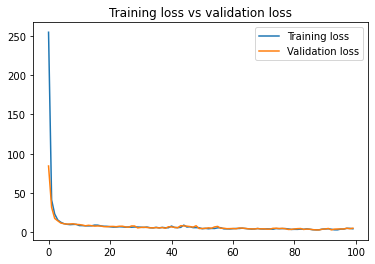

In [31]:
model = build_model(lr = best_lr)
val_size = int(0.3*len(train_data))
x_train = train_data[:val_size]
y_train = train_price[:val_size]
x_val = train_data[val_size:]
y_val = train_price[val_size:]
history = model.fit(train_data, train_price, epochs=100, batch_size = 32, validation_data= (x_val, y_val))
history = history.history

plt.plot(range(100), history['loss'], label='Training loss')
plt.plot(range(100), history['val_loss'], label = 'Validation loss')
plt.legend()
plt.title('Training loss vs validation loss')

Both validation and training loss have decreased

# Make predictions and evaluate accuracy on test set

In [32]:
test_mse, test_mae = model.evaluate(test_data, test_price)

4/4 [==============================] - 0s 15ms/step - loss: 15.0236 - mae: 2.6769


Using the above model, predictions are off by approx 2677$